In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/OscarL7/Shopping-Trends-Analysis/main/shopping_trends_updated.csv')
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


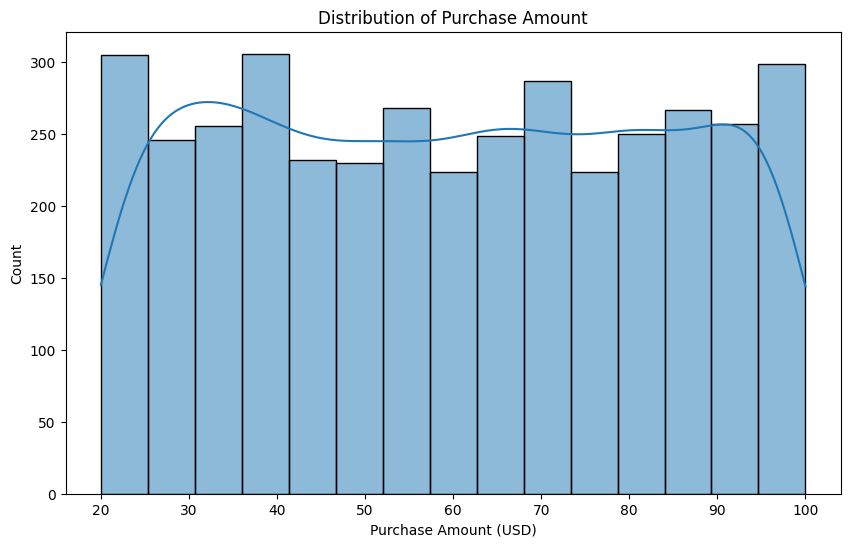

In [6]:
# 1. Distribution of Purchase Amount
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Purchase Amount (USD)', kde=True)
plt.title('Distribution of Purchase Amount')
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Count')
plt.show()

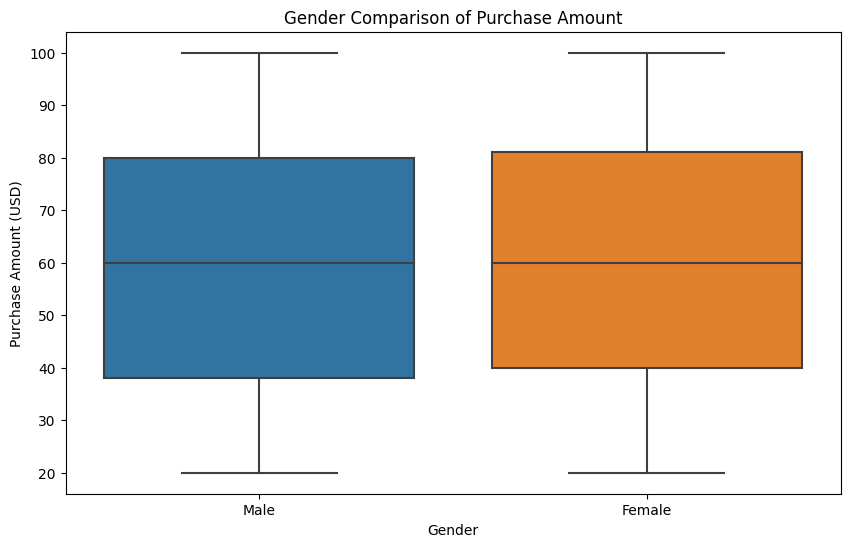

In [7]:
# 2. Gender Comparison of Purchase Amount
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Gender', y='Purchase Amount (USD)')
plt.title('Gender Comparison of Purchase Amount')
plt.xlabel('Gender')
plt.ylabel('Purchase Amount (USD)')
plt.show()

C:\Users\PERSONAL\AppData\Local\Temp\ipykernel_9140\163815225.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Category', y='Purchase Amount (USD)', ci=None)


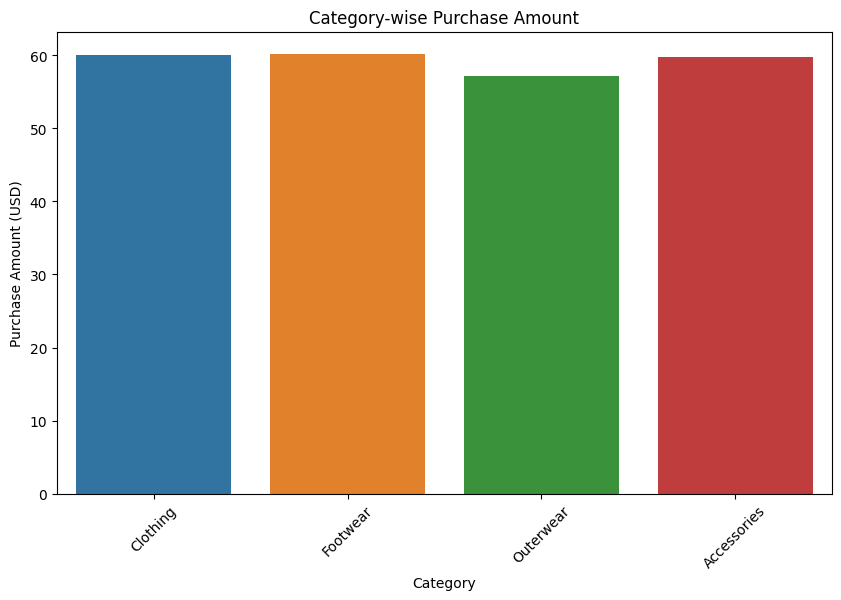

In [8]:
# 3. Category-wise Purchase Amount
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Category', y='Purchase Amount (USD)', ci=None)
plt.title('Category-wise Purchase Amount')
plt.xlabel('Category')
plt.ylabel('Purchase Amount (USD)')
plt.xticks(rotation=45)
plt.show()

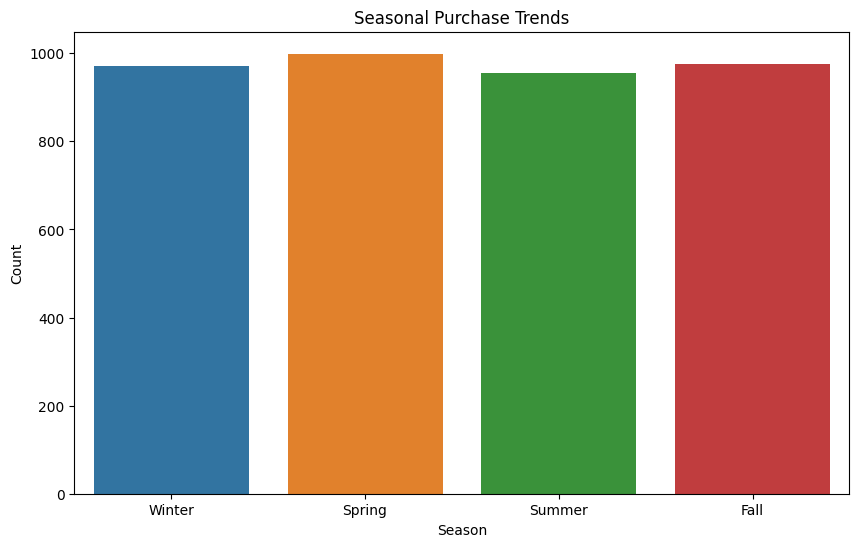

In [9]:
# 4. Seasonal Purchase Trends
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Season')
plt.title('Seasonal Purchase Trends')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

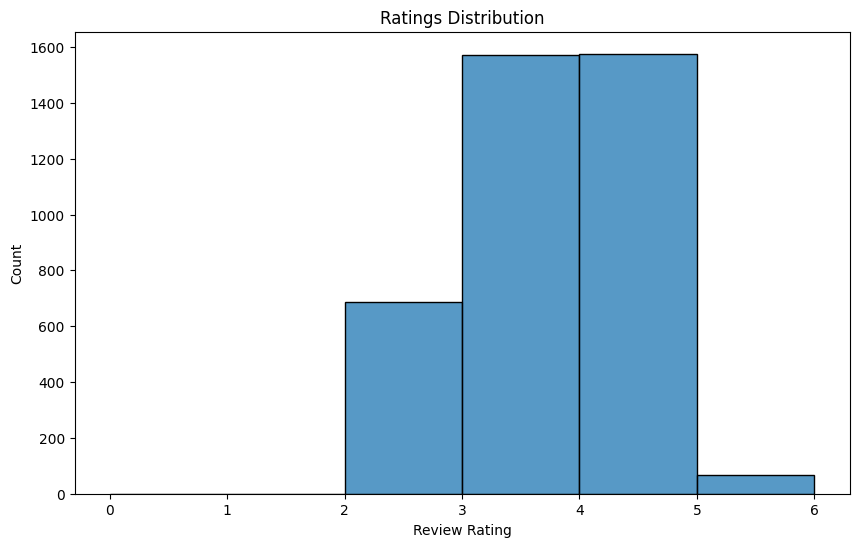

In [10]:
# 5. Ratings Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Review Rating', discrete=True, binrange=(0.5, 5.5), binwidth=1)
plt.title('Ratings Distribution')
plt.xlabel('Review Rating')
plt.ylabel('Count')
plt.show()

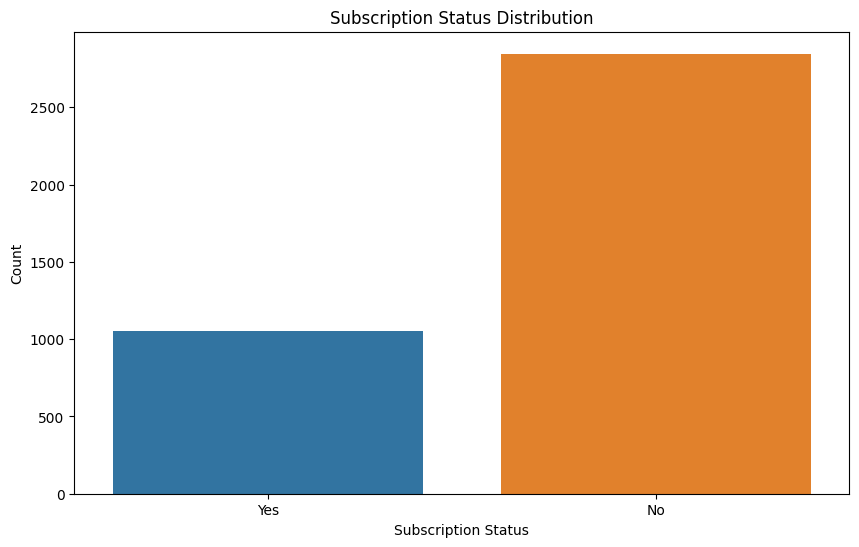

In [11]:
# 6. Subscription Status Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Subscription Status')
plt.title('Subscription Status Distribution')
plt.xlabel('Subscription Status')
plt.ylabel('Count')
plt.show()

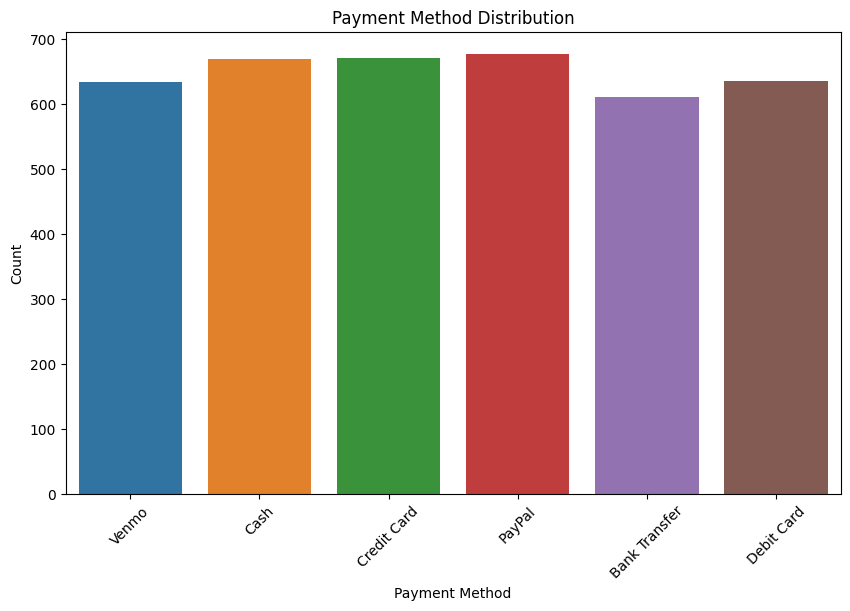

In [12]:
# 7. Payment Method Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Payment Method')
plt.title('Payment Method Distribution')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [13]:
# 8. Statistical Summary by Gender
gender_summary = df.groupby('Gender')['Purchase Amount (USD)'].describe()
print("Statistical Summary by Gender:")
print(gender_summary)

Statistical Summary by Gender:
         count       mean        std   min   25%   50%   75%    max
Gender                                                             
Female  1248.0  60.249199  23.420556  20.0  40.0  60.0  81.0  100.0
Male    2652.0  59.536199  23.809976  20.0  38.0  60.0  80.0  100.0


In [14]:
# 9. Statistical Comparison of Purchase Amount by Category
category_purchase = []
categories = df['Category'].unique()
for category in categories:
    purchase = df[df['Category'] == category]['Purchase Amount (USD)']
    category_purchase.append(purchase)
f_stat, p_value = stats.f_oneway(*category_purchase)
print("\nStatistical Comparison of Purchase Amount by Category:")
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")


Statistical Comparison of Purchase Amount by Category:
F-statistic: 1.4536190218138958
P-value: 0.225219398858934


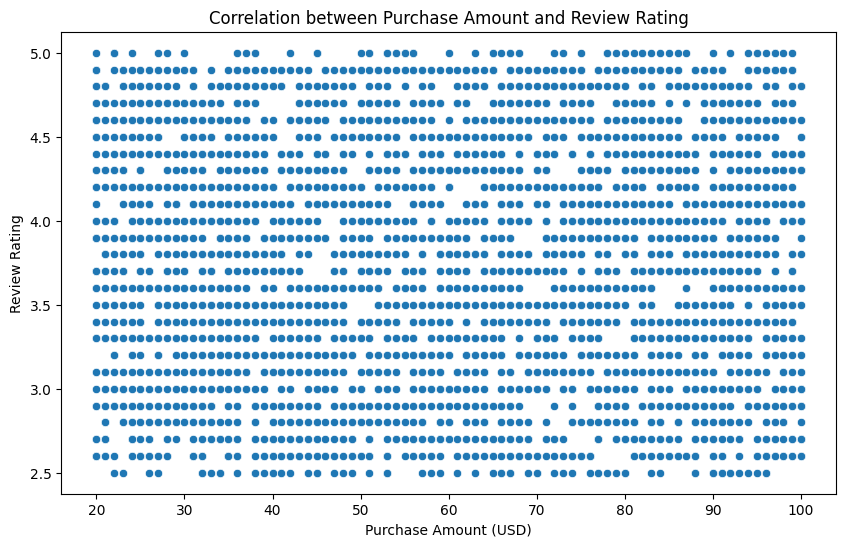

In [15]:
# 10. Correlation between Purchase Amount and Review Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Purchase Amount (USD)', y='Review Rating')
plt.title('Correlation between Purchase Amount and Review Rating')
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Review Rating')
plt.show()